In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow 
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,InputLayer,BatchNormalization,Dropout,Rescaling, Resizing, Reshape

In [2]:
train_directory=r"C:\Users\shubh\Desktop\Final\Framess\archive\Dataset\Train"
test_directory=r"C:\Users\shubh\Desktop\Final\Framess\archive\Dataset\Test"
validation_directory=r"C:\Users\shubh\Desktop\Final\Framess\archive\Dataset\validation"

class_names="Real","Fake"

In [3]:
train_dataset = tensorflow.keras.preprocessing.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=class_names,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=99
)

Found 140147 files belonging to 2 classes.


In [4]:
test_dataset = tensorflow.keras.preprocessing.image_dataset_from_directory(
    test_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=class_names,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=99
)

Found 11109 files belonging to 2 classes.


In [5]:
validation_dataset = tensorflow.keras.preprocessing.image_dataset_from_directory(
    validation_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=class_names,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=99
)

Found 39428 files belonging to 2 classes.


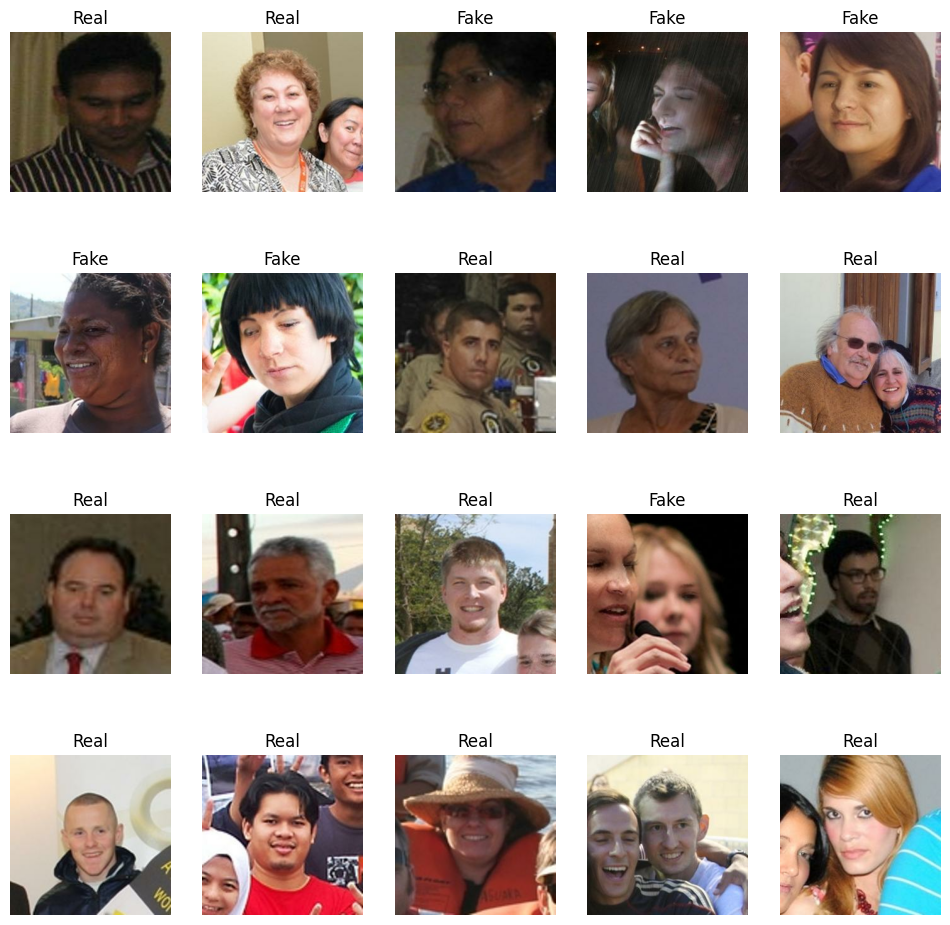

In [6]:
plt.figure(figsize=(12,12))

for images,labels in train_dataset.take(1):
    for i in range(20):
        ax=plt.subplot(4,5,i+1)
        plt.imshow(images[i]/255.0)
        cl = class_names[tensorflow.argmax(labels[i])]
        plt.title(cl)
        plt.axis('off')

In [7]:
from tensorflow.keras.layers import Dense,Flatten
from keras import Sequential
from sklearn.metrics import accuracy_score

In [8]:
model = tensorflow.keras.Sequential([
    InputLayer(input_shape=(256,256,3)),
    Rescaling(1./255,name='rescaling'),

    Conv2D(filters=16,kernel_size=(4,4),strides=2,activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2),strides=2),

    Conv2D(filters=16,kernel_size=(4,4),strides=2,activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2),strides=2),

    Conv2D(filters=36,kernel_size=(2,2),strides=1,activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2),strides=1),

    Conv2D(filters=36,kernel_size=(2,2),strides=1,activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2),strides=1),

    Flatten(),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),

    Dense(2,activation='softmax')
])


C:\Users\shubh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 127, 127, 16)        │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 127, 127, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 16)          │           4,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 30, 30, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 36)          │           2,340 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 36)          │             144 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 36)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 36)          │           5,220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 12, 36)          │             144 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 11, 11, 36)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4356)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         557,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 580,970 (2.22 MB)

 Trainable params: 580,762 (2.22 MB)

 Non-trainable params: 208 (832.00 B)

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(train_dataset,validation_data = validation_dataset,epochs=10)

Epoch 1/10
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 932s 212ms/step - accuracy: 0.8156 - loss: 0.3870 - val_accuracy: 0.8961 - val_loss: 0.2452
Epoch 2/10
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 917s 209ms/step - accuracy: 0.9335 - loss: 0.1626 - val_accuracy: 0.9056 - val_loss: 0.2309
Epoch 3/10
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 917s 209ms/step - accuracy: 0.9502 - loss: 0.1241 - val_accuracy: 0.8167 - val_loss: 0.4843
Epoch 4/10
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 930s 212ms/step - accuracy: 0.9591 - loss: 0.1027 - val_accuracy: 0.7622 - val_loss: 0.7639
Epoch 5/10
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 936s 214ms/step - accuracy: 0.9660 - loss: 0.0860 - val_accuracy: 0.9298 - val_loss: 0.1926
Epoch 6/10
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 936s 214ms/step - accuracy: 0.9716 - loss: 0.0722 - val_accuracy: 0.9117 - val_loss: 0.2581
Epoch 7/10
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 932s 213ms/step - accuracy: 0.9750 - loss: 0.0634 - val_accuracy: 0.9010 - val_loss: 0.3735
Epoch 8/10
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 934s 213ms/step - ac

In [17]:
y_pred=model.predict(test_dataset)

348/348 ━━━━━━━━━━━━━━━━━━━━ 35s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


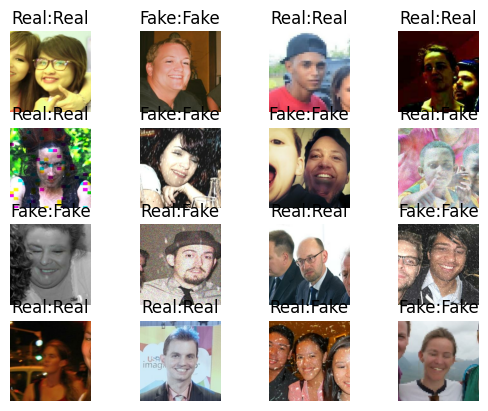

In [18]:
for image,labels in test_dataset.take(1):
    predicted = model.predict(image)
    
    for i in range(16):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(image[i]/255.0)
        plt.title(str(class_names[tensorflow.argmax(labels[i])]) + ':'+ str(class_names[tensorflow.argmax(predicted[i])]))
        plt.axis('off')
        
        
plt.show()

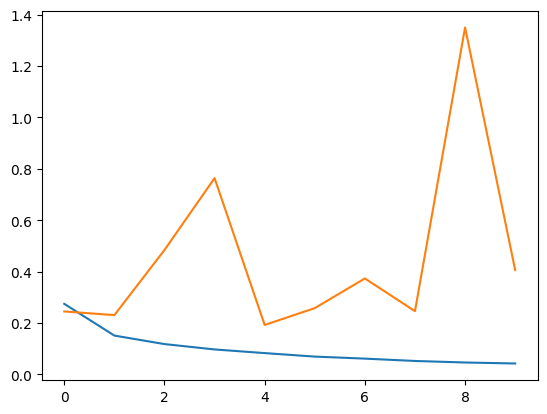

In [19]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

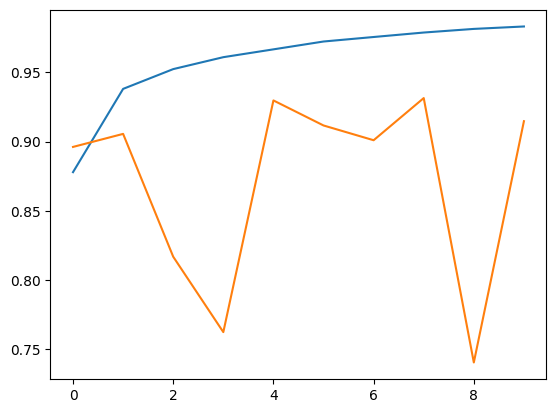

In [20]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

MAKING-PREDICTIVE-SYSTEM

In [21]:
from tensorflow.keras.preprocessing import image


In [30]:
def load_and_preprocess_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Reshape for the model (1, height, width, channels)
    img_array = img_array / 255.0  # Normalize the image (if your model was trained on normalized images)
    return img_array

#img-path
img_path=r"C:\Users\shubh\Desktop\portfolio-website-main\main photo.png"

#input_data load & preprocess
input_data=load_and_preprocess_image(img_path)

#prediction
prediction=model.predict(input_data)
print(prediction)

#condition

predicted_class = np.argmax(prediction[0][1])  # Get the index of the highest probability

if predicted_class == 0:  # Assuming class 0 is 'real'
    print("The image is Real")
else:  # Assuming class 1 is 'fake'
    print("The image is Fake")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.7799977  0.22000225]]
The image is Real


In [32]:
import pickle

In [33]:
filename="Framess"
pickle.dump(model,open("Framess.sav",'wb'))

In [34]:
loaded_model=pickle.load(open("Framess.sav",'rb'))

In [35]:
def load_and_preprocess_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Reshape for the model (1, height, width, channels)
    img_array = img_array / 255.0  # Normalize the image (if your model was trained on normalized images)
    return img_array

#img-path
img_path=r"C:\Users\shubh\Desktop\portfolio-website-main\main photo.png"

#input_data load & preprocess
input_data=load_and_preprocess_image(img_path)

#prediction
prediction=loaded_model.predict(input_data)
print(prediction)

#condition

predicted_class = np.argmax(prediction[0][1])  # Get the index of the highest probability

if predicted_class == 0:  # Assuming class 0 is 'real'
    print("The image is Real")
else:  # Assuming class 1 is 'fake'
    print("The image is Fake")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
[[0.7799977  0.22000225]]
The image is Real
